# Trabajo Práctico de Laboratorio 2

Alumno: Manoukian, Francisco

Curso: R4052

## Descripción del trabajo

El objetivo de este trabajo práctico fue el diseño y verificación de funcionamiento de diferentes topologías de filtros digitales.

Los filtros fueron diseñados siguiendo plantillas sugeridas a través de herramientas digitales de diseño. Su implementación se llevó a cabo en un microcontrolador, con el objetivo de discretizar una señal analógica, procesarla y convertir la señal resultante a analógica nuevamente, para poder así analizar la respuesta utilizando los mismos métodos utilizados previamente en la medición de filtros analógicos.

## Plantillas propuestas

<img src="./Plantilla_FIR.png" align="left" width="55%">


<img src="./Plantilla_IIR.png" align="left" width="55%">

## Transferencias obtenidas

Los filtros A y C se diseñaron utilizando la herramienta de interfaz visual *pyfda*, mientras que el filtro B se diseñó utilizando la función *firls* provista por scipy. La frecuencia de muestreo propuesta para la implementación es $f_s=40kHz$

### Filtro A

<img src="./fir_eq_1.png">

Coeficientes obtenidos:

<pre>-0.0516038426863699    -0.007634315704683342    -0.006788611900933189    -0.004873327093108144   
-0.0018349926008721202    0.002330954717100911    0.007574850808482849    0.01379050733003701    
0.020816491713683247    0.028440796724530065    0.03640907774635375    0.0444355904023601     
0.052216634226004775    0.05944559238719488    0.0658285357830471    0.07109969831742727  
0.07503570077699821    0.07746758787834511    0.07829012297251628    0.07746758787834511   
0.07503570077699821    0.07109969831742727    0.0658285357830471    0.05944559238719488 
0.052216634226004775    0.0444355904023601    0.03640907774635375    0.028440796724530065 
0.020816491713683247    0.01379050733003701    0.007574850808482849    0.002330954717100911    
-0.0018349926008721202    -0.004873327093108144    -0.006788611900933189    -0.007634315704683342   
-0.0516038426863699   </pre>

### Filtro B

Se detalla a continuación el código utilizado para obtener la transferencia y los gráficos:

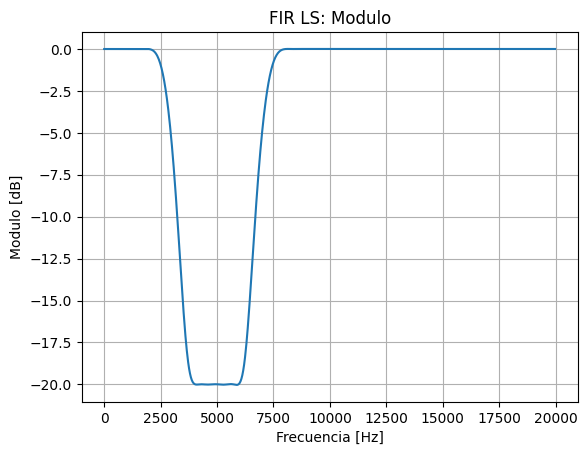

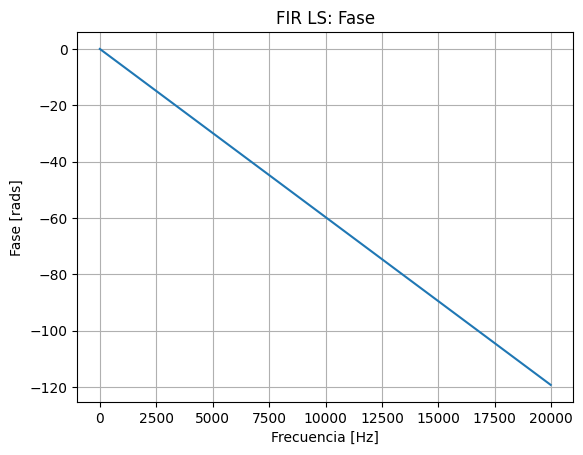

Coeficientes del filtro: 

[-0.00015054608322540884 -0.0005022892270730879  -0.0007931440453481245
 -0.0005850241702554637   0.0002374794703879601   0.0011228300094569676
  0.0012787728691436425   0.000635025140113926    0.0001896589661193716
  0.0009487207887912402   0.002359844467725184    0.002273336622073966
 -0.0008233680868006567  -0.005412032816857823   -0.007557517015645397
 -0.004830704418242715    0.00043173134518336413  0.0029284509635781604
  0.0004265251421872642  -0.0025542196291081388   0.001097852733654344
  0.012102701705448485    0.02111234379401283     0.016681160544148897
 -0.001642946491264933   -0.019820487494452626   -0.022216974178656555
 -0.009369333058419756   -0.0002232110334957563  -0.012105490307834432
 -0.03687424560838374    -0.04116659314756641     0.0022747710232858213
  0.0791932706424284      0.13269534967943858     0.10654195549097091
 -0.0014070451435846643  -0.12612760184011307     0.8190619955076066
 -0.12612760184011307    -0.0014070451435846643 

In [5]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

fs = 40000
nyq = 20000

cant_coef = 77

fpass = np.array([2000, 8000])
fstop = np.array([4000, 6000])
gpass = 1
gstop = 20 

frecs = [0.0,   fpass[0],     fstop[0],     fstop[1],     fpass[1],     nyq]
gains = [0,     0,     -gstop,     -gstop,      0,      0] 
gains = 10**(np.array(gains)/20)

fir_ls = sig.firls(cant_coef, frecs, gains, fs=fs)

wrad, hh = sig.freqz(fir_ls, worN = 1000)
ww = wrad/np.pi * nyq

#------ Modulo ------
modulo = plt.figure()
plt.title('FIR LS: Modulo')
plt.plot(ww, 20 * np.log10(abs(hh)))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Modulo [dB]')
plt.grid()
plt.show()

#------ Fase ------
fase = plt.figure()
plt.title('FIR LS: Fase')
angles = np.unwrap(np.angle(hh))
plt.plot(ww, angles)
plt.ylabel('Fase [rads]')
plt.xlabel('Frecuencia [Hz]')
plt.grid()
plt.show()

np.set_printoptions(precision=20, suppress = True)
print("Coeficientes del filtro: \n")
print(fir_ls)

### Filtro C

<img src="./iir_1.png">

Coeficientes obtenidos:

$a_0$ = 1.0

$a_1$ = -1.6911935001269052

$a_2$ = 0.7328730637371653

$b_0$ = 0.010419890902565022	

$b_1$ = 0.020839781805130044

$b_2$ = 0.010419890902565022

## Implementación en Hardware

El microcontrolador elegido para la implementación fue el LPC1769, que cuenta con un núcleo ARM Cortex M3. 

El software que implementa las funciones de adquisición y procesamiento de señales fueron provistos, siendo accesibles a través del siguiente <a href="https://drive.google.com/file/d/17Rqw6YrCyo1QzwFdLEHyjg_P-k4h3QPc/view">enlace</a>. Contando con el mismo, fue necesario modificar los coeficientes de los filtros a procesar y las directivas que los acompañan. Las funciones de procesamiento utilizadas por el software están provistas por el fabricante del núcleo, dentro de la biblioteca CMSIS_DSP

En cuanto a hardware, se implementaron dos etapas idénticas, activas y de topología Sallen Key, tanto para el filtro anti-alias como para el de reconstrucción. Los valores elegidos para los componentes son:

$R_1, R_2 = 6.8k\Omega$

$C_1, C_2 = 1.2nF$

<img src="./filtro_analogico.png" width="30%" align="left">

dando a los filtros la siguiente respuesta en frecuencia:

<img src="./transferencia_analogico.png" width="70%" align="left">

## Procedimiento de medición

Al igual que en la práctica anterior de medición de funciones de transferencia, se utilizaron dos métodos.


### Método 1

El primero consistió en observar la diferencia de tensiones entre entrada y salida del sistema (es decir, antes del filtro anti-alias y después del filtro de reconstrucción) mientras se inyectaba una señal senoidal de frecuencia variable, intentando abarcar la mayor parte del espectro posible con una cantidad relevante de puntos. Luego, a través de las mediciones tomadas se calculó el módulo de la transferencia del sistema, para cada filtro, siendo el mismo obtenido como:

$H(f) = 20·\log_{10} \frac{v_o(f)}{v_i(f)}$

Las tensiones se tomaron a partir de los valores RMS provistos por el osciloscopio, utilizando una escala horizontal tal que incluyera al menos 3 ciclos enteros de la señal. La escala vertical se ajustó dinámicamente de forma tal de mantener la señal de salida siempre a fondo de escala.

### Método 2

Para el segundo método, se utilizó un analizador de espectro conectado de forma similar al anterior método (inyectando previo al filtro anti-alias y muestreando luego del filtro de reconstrucción). El analizador de espectro realiza un barrido automatizado en una cantidad de puntos arbitraria, y muestrea la señal con una resolución de 24 bits permitiendo así una medición con mayor resolución y menor error humano. Luego del barrido, el analizador devuelve un archivo con los puntos de frecuencia muestreados y el módulo obtenido.

## Resultados de las mediciones

### Método 1

Text(0, 0.5, 'Ganancia [dB]')

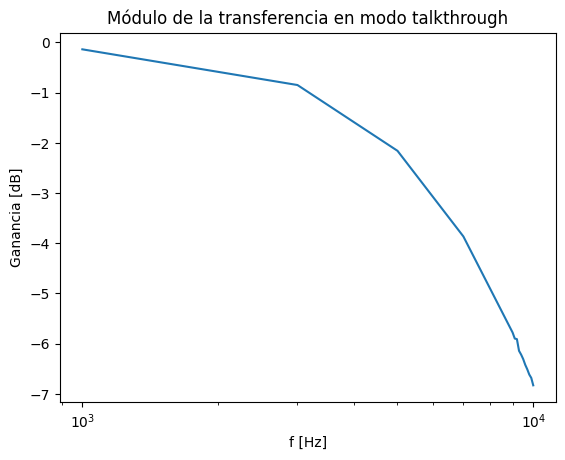

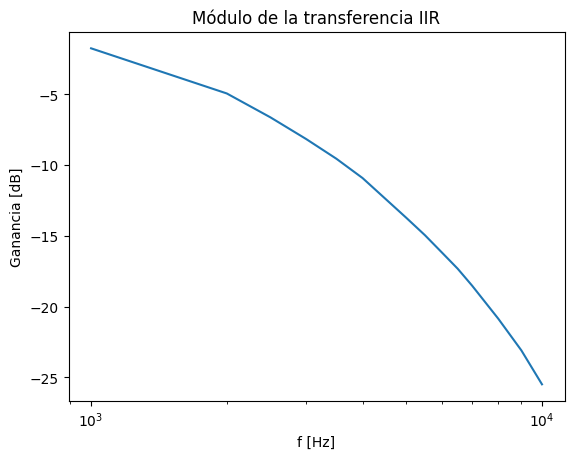

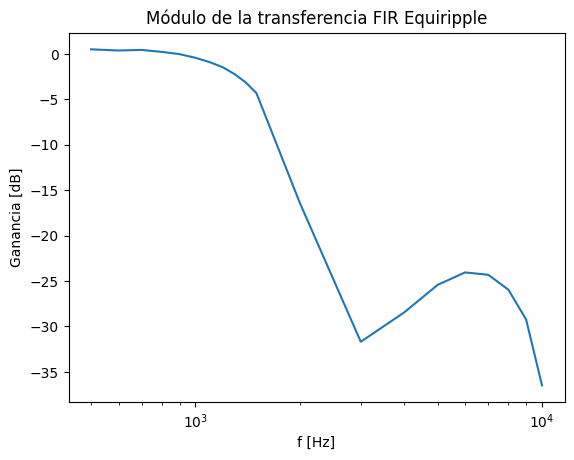

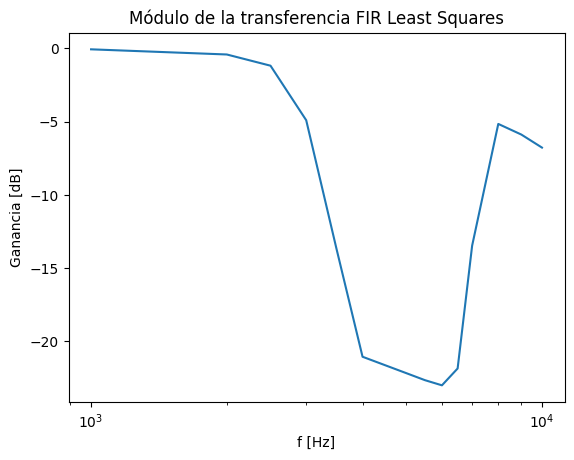

In [41]:
import pandas as pd

datos_tk = pd.read_excel("mediciones_tplab2.xlsx", sheet_name = "Talkthrough", usecols=["f [Hz]", "Amplitud Entrada[Vrms]", "Amplitud Salida [Vrms]", "Ganancia [dB]"],)
plt.figure()
plt.semilogx(datos_tk["f [Hz]"],datos_tk["Ganancia [dB]"])
plt.title("Módulo de la transferencia en modo talkthrough")
plt.xlabel('f [Hz]')
plt.ylabel('Ganancia [dB]')

datos_iir = pd.read_excel("mediciones_tplab2.xlsx", sheet_name="IIR_LP", usecols=["f [Hz]", "Amplitud Entrada[Vrms]", "Amplitud Salida [Vrms]", "Ganancia [dB]"])
plt.figure()
plt.semilogx(datos_iir["f [Hz]"],datos_iir["Ganancia [dB]"])
plt.title("Módulo de la transferencia IIR")
plt.xlabel('f [Hz]')
plt.ylabel('Ganancia [dB]')

datos_fir_eq = pd.read_excel("mediciones_tplab2.xlsx", sheet_name="FIR_LP", usecols=["f [Hz]", "Amplitud Entrada[Vrms]", "Amplitud Salida [Vrms]", "Ganancia [dB]"])
plt.figure()
plt.semilogx(datos_fir_eq["f [Hz]"], datos_fir_eq["Ganancia [dB]"])
plt.title("Módulo de la transferencia FIR Equiripple")
plt.xlabel('f [Hz]')
plt.ylabel('Ganancia [dB]')

datos_fir_ls = pd.read_excel("mediciones_tplab2.xlsx", sheet_name="FIR_BE", usecols=["f [Hz]", "Amplitud Entrada[Vrms]", "Amplitud Salida [Vrms]", "Ganancia [dB]"])
plt.figure()
plt.semilogx(datos_fir_ls["f [Hz]"], datos_fir_ls["Ganancia [dB]"])
plt.title("Módulo de la transferencia FIR Least Squares")
plt.xlabel('f [Hz]')
plt.ylabel('Ganancia [dB]')

### Método 2

Text(0, 0.5, 'Ganancia [dB]')

<Figure size 640x480 with 0 Axes>

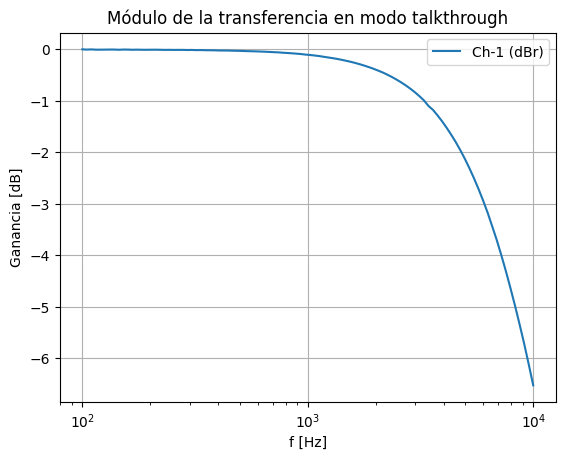

<Figure size 640x480 with 0 Axes>

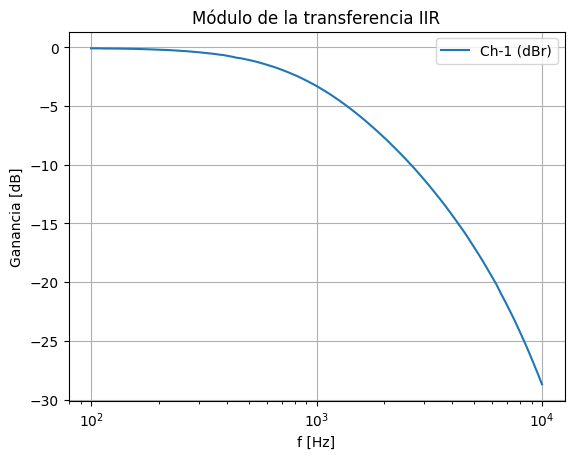

<Figure size 640x480 with 0 Axes>

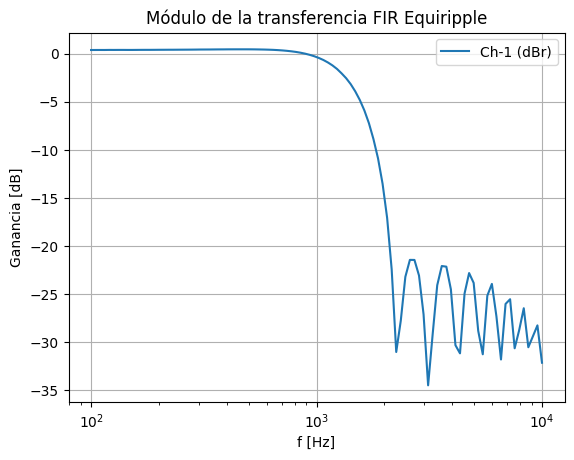

In [37]:
ana_tk = pd.read_csv("./Sweep Data TK.csv")
ana_iir = pd.read_csv("./Sweep Data IIR.csv")
ana_fir_eq = pd.read_csv("./Sweep Data FIR_EQ.csv")
ana_fir_ls = pd.read_csv("./Sweep Data FIR_LS.csv")

plt.figure()
ana_tk.plot(kind='line', x='X (Hz)',y='Ch-1 (dBr)', logx=True, grid=True, title="Módulo de la transferencia en modo talkthrough")
plt.xlabel('f [Hz]')
plt.ylabel('Ganancia [dB]')

plt.figure()
ana_iir.plot(kind='line', x='X (Hz)',y='Ch-1 (dBr)', logx=True, grid=True, title="Módulo de la transferencia IIR")
plt.xlabel('f [Hz]')
plt.ylabel('Ganancia [dB]')

plt.figure()
ana_fir_eq.plot(kind='line', x='X (Hz)',y='Ch-1 (dBr)', logx=True, grid=True, title="Módulo de la transferencia FIR Equiripple")
plt.xlabel('f [Hz]')
plt.ylabel('Ganancia [dB]')

plt.figure()
ana_fir_ls.plot(kind='line', x='X (Hz)',y='Ch-1 (dBr)', logx=True, grid=True, title="Módulo de la transferencia FIR Least Squares")
plt.xlabel('f [Hz]')
plt.ylabel('Ganancia [dB]')

## Conclusiones

A través de las actividades propuestas se pudo verificar la funcionalidad de las transferencias propuestas a través de métodos ya ensayados anteriormente con filtros analógicos. A la vez, se pudo poner en práctica una aplicación de procesamiento digital de señales reales muestreadas y convertidas a analógicas nuevamente, demostrando la utilidad de las herramientas de filtrado digital.

Dado que la implementación propuesta del filtro IIR demostró un comportamiento inesperado, se realizó un análisis con un filtro de menor orden pero que proveyó un resultado esperable.